<a href="https://colab.research.google.com/github/vignesh200245/Guvi-Final-project-/blob/main/Final_project_Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import Libraries and load dataset**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# load the dataset
df = pd.read_csv('/content/train.csv')
print("shape of the data:", df.shape)
df.head()

shape of the data: (45211, 11)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


##**Data Cleaning**

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
# check data types of all columns
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
'''#correcting data type of the column num_calls
df['num_calls']=df['num_calls'].astype(int)
#correcting data type of the column dur,day
df['dur']=df['dur'].astype(int)
df['day']=df['day'].astype(int)'''

"#correcting data type of the column num_calls\ndf['num_calls']=df['num_calls'].astype(int)\n#correcting data type of the column dur,day\ndf['dur']=df['dur'].astype(int)\ndf['day']=df['day'].astype(int)"

In [ ]:
df.duplicated().sum()  #there are 6 duplicate rows we need to drop


6

In [ ]:
df.drop_duplicates()        #duplicated values dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


Exploring the Dataset and replace the unknown values

In [ ]:
#no of counts for particular job
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
# droping the column unknown
#outof 45211 rows, deletion of 288 rows will not get more impact on dataset so planning to delete

#replacing unknown value as null
df['job'] =df['job'].replace('unknown',np.nan)


In [ ]:
#counting the no of null value in jab column
df.job.isnull().sum()

288

In [ ]:
#removing null values from job column
df=df.dropna(subset=['job'])

In [ ]:
#after removing null values checking for the summ of null vaues
df.job.isnull().sum()

0

In [ ]:
#no of counts for marital status, there is no unknown
df.marital.value_counts()

married     27011
single      12722
divorced     5190
Name: marital, dtype: int64

In [ ]:
#no of counts for Educational qualification
df.education_qual.value_counts()

secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: education_qual, dtype: int64

In [ ]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((1730) / (23131+13262+6800+1730)) * 100 )

Percentage for "Unknown":  3.8510339914965606


Unknown percentage is 3.8% so if we delete also it will note affect the dataset

In [ ]:
#replacing unknown value as null
df['education_qual'] =df['education_qual'].replace('unknown',np.nan)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#checking for null values
df.education_qual.isnull().sum()

1730

In [ ]:
#droping the null values
df = df. dropna(subset=['education_qual'])

In [ ]:
#checking for null value after deleting
df.education_qual.isnull().sum()


0

In [ ]:
#no of counts for Call type
df.call_type.value_counts()

cellular     28213
unknown      12286
telephone     2694
Name: call_type, dtype: int64

In [ ]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((12286) / (28213+12286+12283)) * 100 )

Percentage for "Unknown":  23.276874692129894


Unknown call type percentage is 23.27% so we will keep as it is.



In [ ]:
#no of counts for previous outcome
df.prev_outcome.value_counts()

unknown    35286
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [ ]:

#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((35286) / (35286+4709+1774+1424)) * 100 )

Percentage for "Unknown":  81.69379297571365


It is around 81% values are unknown. So will keep unknown value as it is.

In [ ]:
df.describe()      # statistically cheking any outlires present or not

,age,day,dur,num_calls
count,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,15.809414,258.323409,2.758178
std,10.512640,8.305970,258.162006,3.063987
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,318.000000,3.000000
max,95.000000,31.000000,4918.000000,58.000000


##**Exploratory Data Analysis**


Dependendent Variable

In [ ]:
df["y"].value_counts()

no     38172
yes     5021
Name: y, dtype: int64

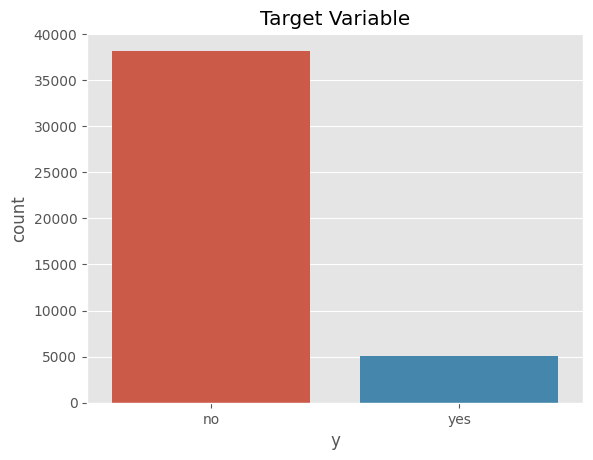

In [ ]:
sns.countplot(x="y", data=df)
plt.title("Target Variable")
plt.show()

In [ ]:
# percentage of class present in target variable(y)
print("percentage of NO and YES\n",df["y"].value_counts()/len(df)*100)

percentage of NO and YES
 no     88.375431
yes    11.624569
Name: y, dtype: float64


univariate analysis of categorical variables

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


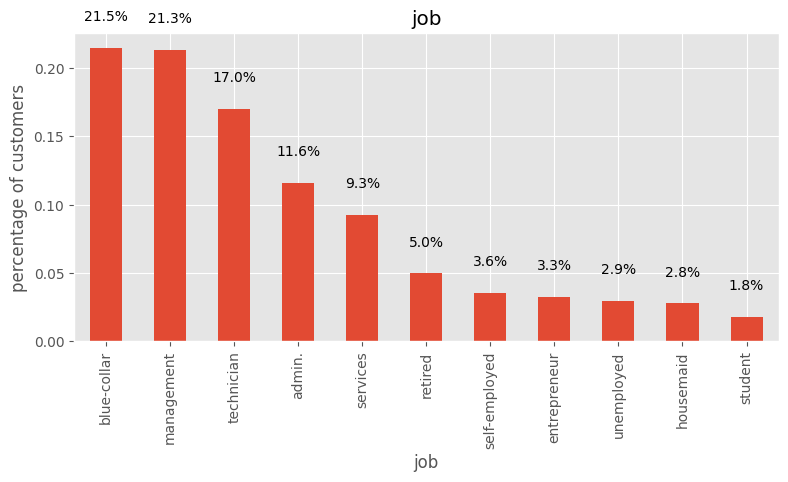

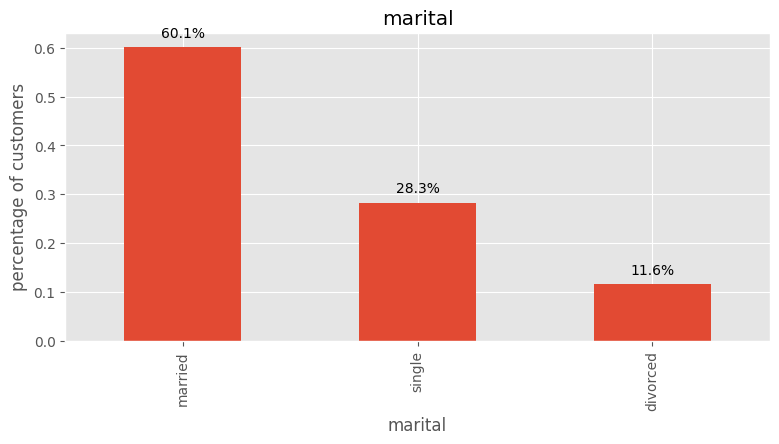

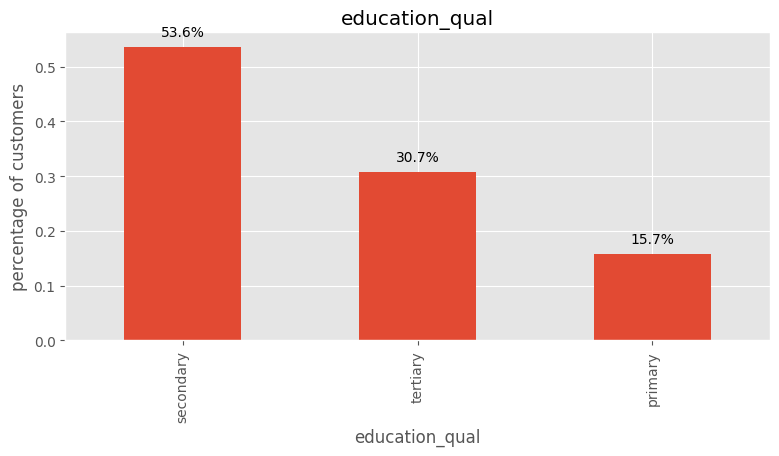

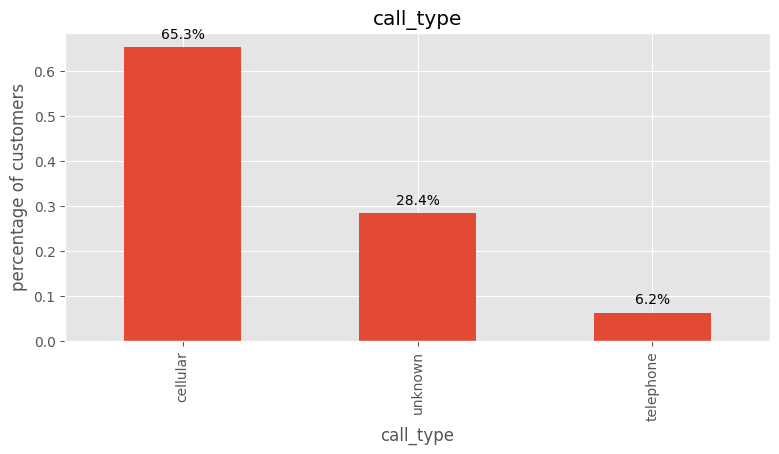

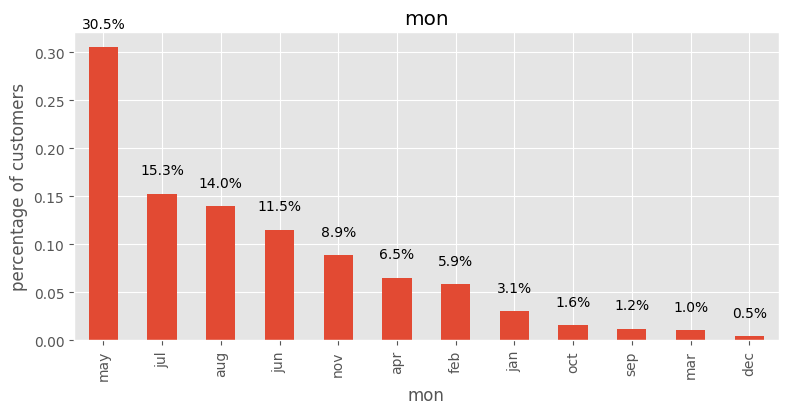

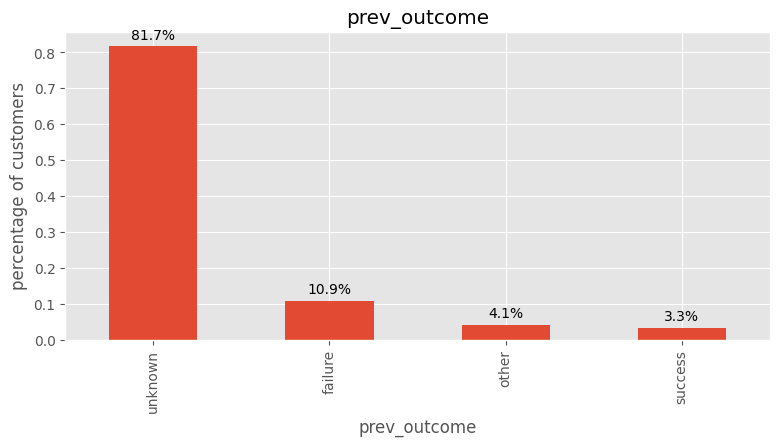

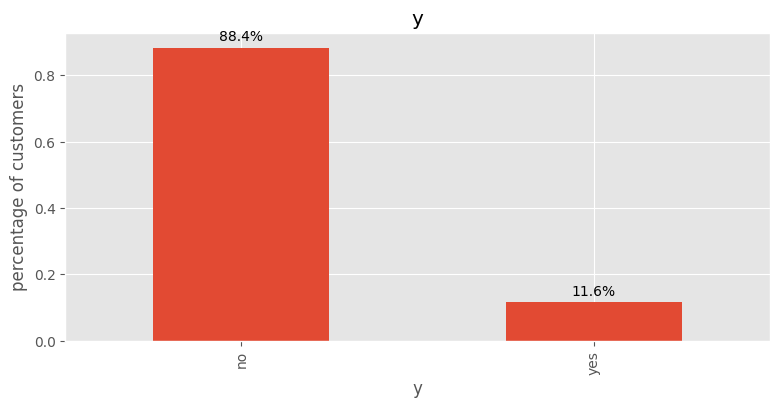

In [ ]:
# indentifying the categorical variables
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    df[column].value_counts(normalize=True).plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("percentage of customers")
    plt.title(column)

    # Add percentage labels to the top of each bar
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.02, f"{p.get_height()*100:.1f}%", ha="center")

Observations :

The top three professions that our customers belong to are -Management , blue-collar jobs and technicians.

A huge number of the customers are married.

Cellular type is most used by customers.

Many customers have been contacted in the month of May.

Very less number of customers are there who succeessfully converted previously

Most of customers are belong to secondary education qualification

The plot for the target variable shows heavy imbalance in the target variable.

The missing values in some columns have been represented as unknown. unknown represents missing data.

3.3 Univariate analysis of Numerical columns

In [ ]:
# indentifying the numerical variables
num_var= df.select_dtypes(include=np.number)
num_var.head()


,age,day,dur,num_calls
0,58,5,261,1
1,44,5,151,1
2,33,5,76,1
5,35,5,139,1
6,28,5,217,1




`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

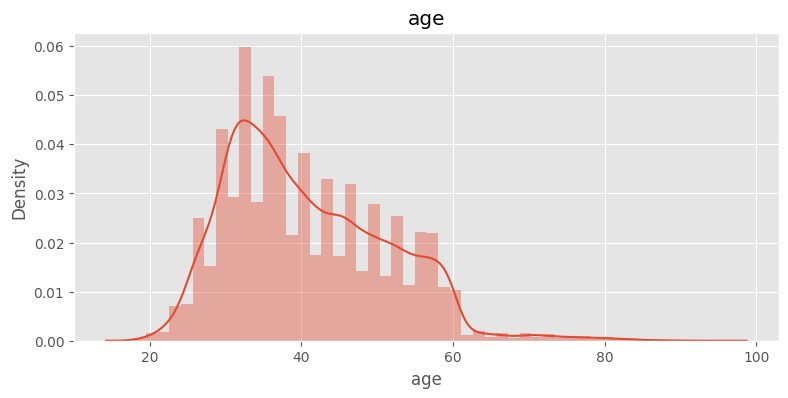

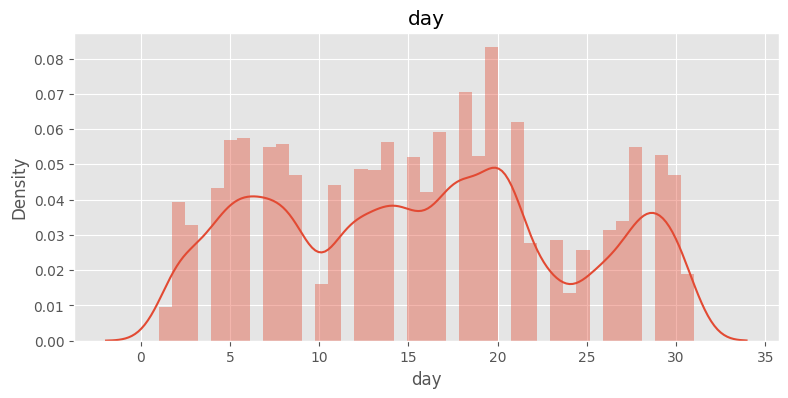

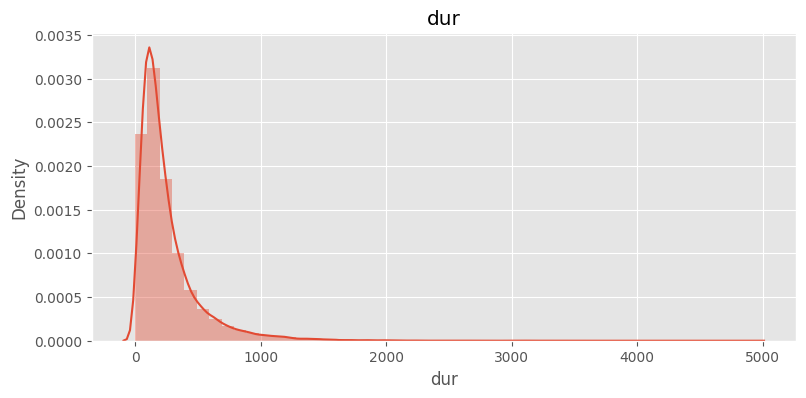

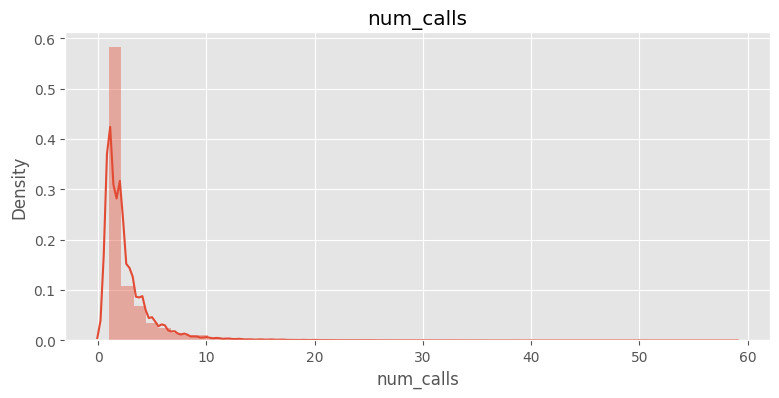

In [ ]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "day", "dur",'num_calls']:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df[column], kde=True)
    plt.title(column)

Observation :

As we can see from the histogram, the features age, dur and num_calls are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features.

Looking at the plot for num_calls, we can infer that majority of the customers were being contacted for the first or second time time

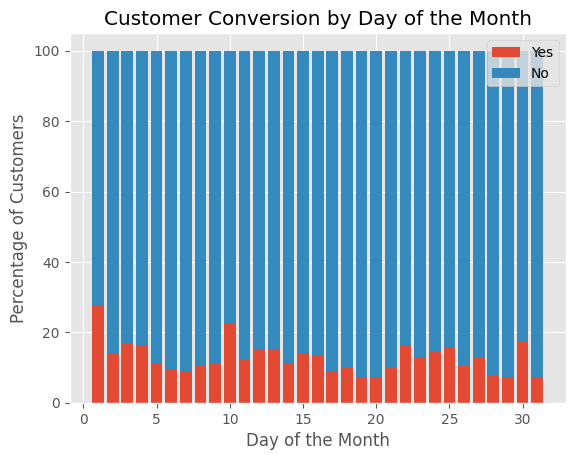

In [ ]:
day_counts = df.groupby('day')['y'].value_counts(normalize=True) * 100
yes_counts = day_counts[:, 'yes']
no_counts = day_counts[:, 'no']

plt.bar(day_counts.index.levels[0], yes_counts, label='Yes')
plt.bar(day_counts.index.levels[0], no_counts, bottom=yes_counts, label='No')
plt.xlabel('Day of the Month')
plt.ylabel('Percentage of Customers')
plt.title('Customer Conversion by Day of the Month')
plt.legend()
plt.show()


Observation

from above plot we can see 1,10,30 dates are when customer said yes **most**

Bivariate Analysis of Categorical Columns

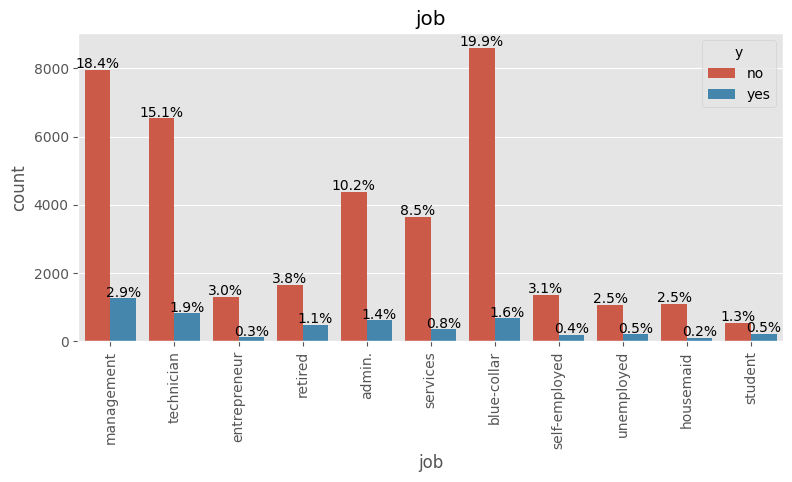

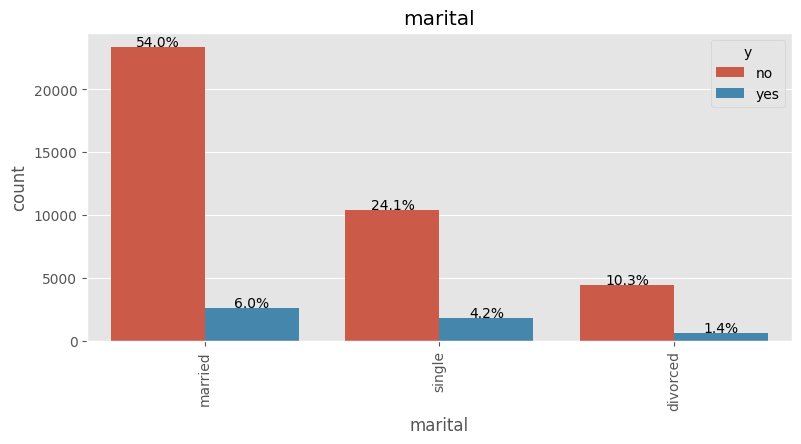

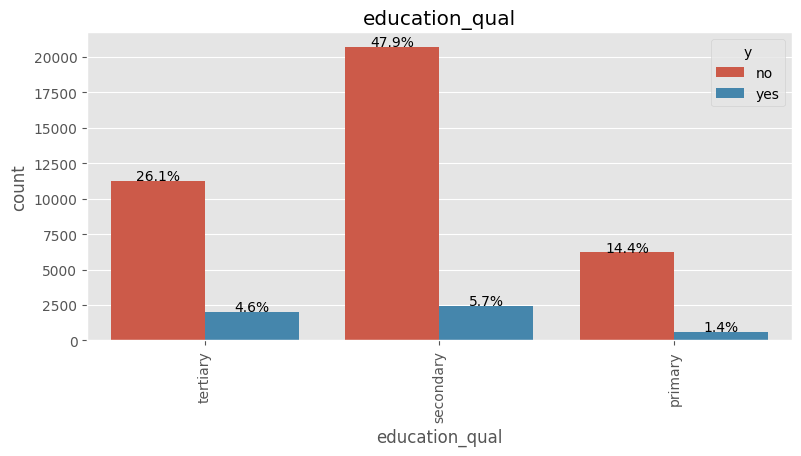

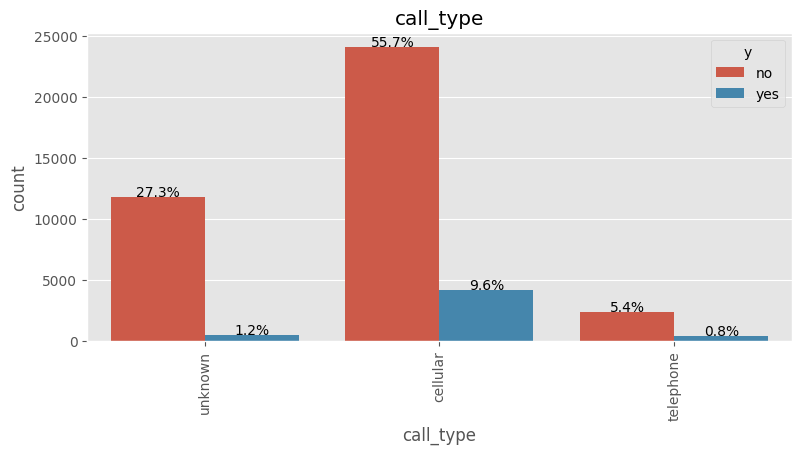

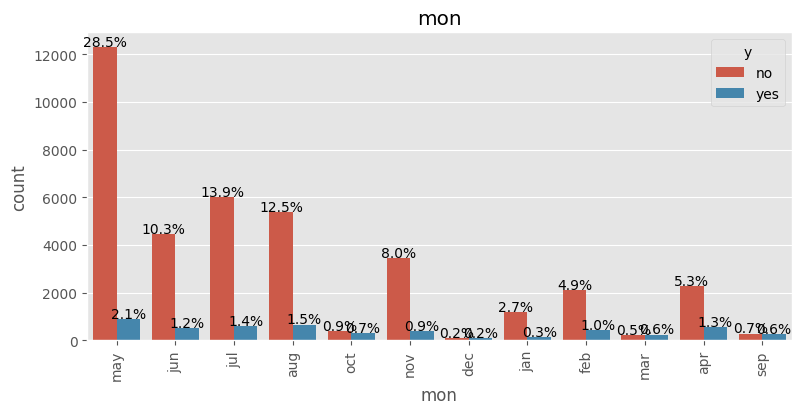

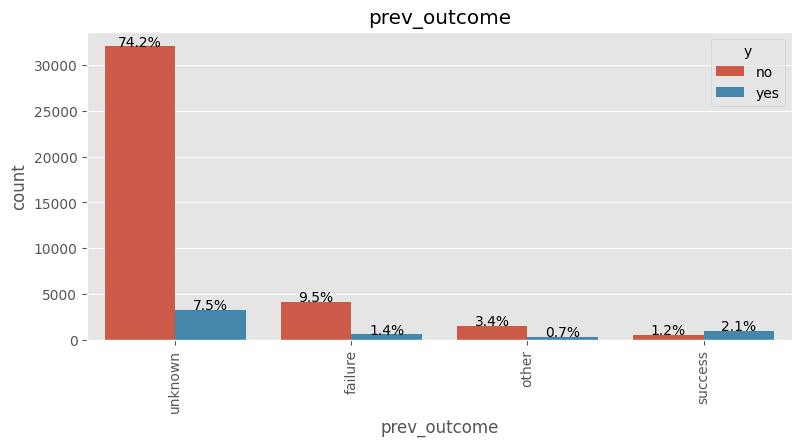

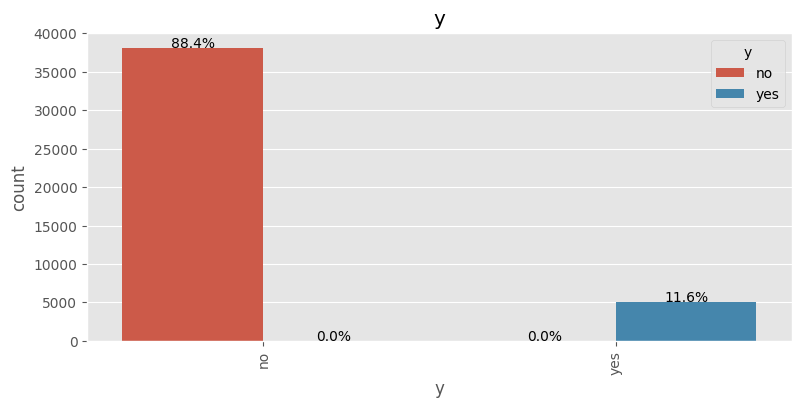

In [ ]:
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    sns.countplot(x=column, hue="y", data=df)
    plt.title(column)
    plt.xticks(rotation=90)

    # Add percentage labels to the top of each bar
    for p in ax.patches:
        height = p.get_height()
        total = sum([p.get_height() for p in ax.patches if p.get_x() == p.get_x()])
        ax.text(p.get_x()+p.get_width()/2., height+50, f"{height/total*100:.1f}%", ha="center")

    plt.show()


Observations:

1.Customers having management jobs form the majority amongst those who have converted most.

2.married most of them converted

3.secondary education qualfied are converted most**

4.Cell-phones should be the preferred mode of contact for contacting customers.

5.May month should be the prefered month to contact

5.Handling Outliers

Outliers cause significant impact on the Mean and Variance.It becomes necessary to treat the outliers.

In [ ]:
df.describe()

,age,day,dur,num_calls
count,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,15.809414,258.323409,2.758178
std,10.512640,8.305970,258.162006,3.063987
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,318.000000,3.000000
max,95.000000,31.000000,4918.000000,58.000000


##**Encoding**

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

**Job**

In [ ]:
#Encoding for job column (Label Encoding)
df['job']=df['job'].map({'blue-collar':0,'entrepreneur':1,'services':2,'housemaid':3,'technician':4,'self-employed':5,'admin.':6,'management':7, 'unemployed':8, 'retired': 9, 'student' : 10})


In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,4,single,secondary,unknown,5,may,151,1,unknown,no
2,33,1,married,secondary,unknown,5,may,76,1,unknown,no
5,35,7,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,7,single,tertiary,unknown,5,may,217,1,unknown,no


**Marital** **Status**

In [ ]:
#Encoding for Marital status (Label Encoding)
df['marital'] =df['marital'].map({'married': 0, 'divorced': 1, 'single' : 2})
df['education_qual'] = df['education_qual'].map({'primary': 0, 'secondary': 1, 'tertiary' :2})
# Encoding for month column (Label Encoding)
df['mon']=df['mon'].map({'may': 0, 'jul' : 1, 'jan': 2, 'nov': 3, 'jun' : 4, 'aug' : 5, 'feb' : 6, 'apr' : 7, 'oct' : 8, 'dec' : 9 , 'sep': 10, 'mar': 11})
# Encoding for call type column (Label Encoding)
df['call_type'] = df['call_type'].map({'unknown': 0, 'telephone' : 1, 'cellular' : 2})
# Encoding for previous outcome column (Label Encoding)
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 0, 'failure' : 1, 'other' : 2, 'success': 3})
df['y']=df['y'].map({'no':0,'yes':1})

In [ ]:
df.head()



,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,1,0,1,0,5,0,76,1,0,0
5,35,7,0,2,0,5,0,139,1,0,0
6,28,7,2,2,0,5,0,217,1,0,0


##**Spliting**


Separating independent and dependent variables

In [ ]:
def split(dataframe):
  x = dataframe.drop('y',axis=1)
  y = dataframe['y']
  return x,y

In [ ]:
x,y = split(df)

In [ ]:
x.head(4)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58,7,0,2,0,5,0,261,1,0
1,44,4,2,1,0,5,0,151,1,0
2,33,1,0,1,0,5,0,76,1,0
5,35,7,0,2,0,5,0,139,1,0


SMOTE Oversampling we are using due to imbalence data

In [ ]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42 )


In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(34554, 10) (8639, 10) (34554,) (8639,)


In [ ]:
#Balancing the data
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [ ]:
print(len(x_train_smt))
print(len(y_train_smt))

51571
51571


In [ ]:
y_train_smt

0        0
1        0
2        0
3        0
4        0
        ..
51566    1
51567    1
51568    1
51569    1
51570    1
Name: y, Length: 51571, dtype: int64

In [ ]:

#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

##**Models**

1.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.761430721148281

In [ ]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.67252599, 0.32747401],
       [0.94027028, 0.05972972],
       [0.98561169, 0.01438831],
       ...,
       [0.44476884, 0.55523116],
       [0.91724743, 0.08275257],
       [0.99277656, 0.00722344]])

In [ ]:

log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.89


K-Nearest Neighbour (KNN)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt)
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))



K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.884130375305781
K value : 2 Train Score :  0.9807449923406566 Cross Value Accuracy : 0.8928117355478307
K value : 3 Train Score :  0.9660080277675438 Cross Value Accuracy : 0.8922328977297111
K value : 4 Train Score :  0.9612766865098602 Cross Value Accuracy : 0.8951269527058925
K value : 5 Train Score :  0.9530356207946327 Cross Value Accuracy : 0.8968636002746664
K value : 6 Train Score :  0.9499137111942758 Cross Value Accuracy : 0.8975576423758638
K value : 7 Train Score :  0.9456283570223575 Cross Value Accuracy : 0.8984828977297112
K value : 8 Train Score :  0.9432239049077971 Cross Value Accuracy : 0.8976732490021888
K value : 9 Train Score :  0.9397723526788311 Cross Value Accuracy : 0.8979044622548388
K value : 10 Train Score :  0.9370964301642396 Cross Value Accuracy : 0.897905266941333
K value : 20 Train Score :  0.9223206841054081 Cross Value Accuracy : 0.8972106883824729
K value : 30 Train Score :  0.9132070349615093 

In [ ]:

knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))



KNN Score:  0.7874754022456303


X has feature names, but KNeighborsClassifier was fitted without feature names


AUROC on the sampled dataset :  0.5175370226032736


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier()
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))


Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.7944319556344458


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7814081557464466  Cross val score :  0.8855199347667483
Depth  :  2  Training Accuracy :  0.8015357468344613  Cross val score :  0.897789257971761
Depth  :  3  Training Accuracy :  0.8536386728975587  Cross val score :  0.8997571187931849
Depth  :  4  Training Accuracy :  0.8599600550697097  Cross val score :  0.9038077764902794
Depth  :  5  Training Accuracy :  0.8790211553004595  Cross val score :  0.9019567293249219
Depth  :  6  Training Accuracy :  0.8924007678734173  Cross val score :  0.898830656409596
Depth  :  7  Training Accuracy :  0.9042872932462043  Cross val score :  0.8930433511437277
Depth  :  8  Training Accuracy :  0.9135560683329779  Cross val score :  0.8947795963692545
Depth  :  9  Training Accuracy :  0.9254425937057649  Cross val score :  0.8935055094201966
Depth  :  10  Training Accuracy :  0.9354676077640535  Cross val score :  0.8933905733659498
Depth  :  20  Training Accuracy :  0.997188342285393  Cross val score :  0.877995

In [ ]:

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.8790211553004595
AUROC on the sampled dataset :  0.8688512795610728


Random Forest


In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
#  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.997188342285393  Cross val score :  0.8830815511604223
Depth  :  2  Training Accuracy :  0.997188342285393  Cross val score :  0.8841812891944041
Depth  :  3  Training Accuracy :  0.997188342285393  Cross val score :  0.8905481689178325
Depth  :  4  Training Accuracy :  0.997188342285393  Cross val score :  0.8932107419467223
Depth  :  5  Training Accuracy :  0.997188342285393  Cross val score :  0.897175364809455
Depth  :  6  Training Accuracy :  0.997188342285393  Cross val score :  0.9007349704534491
Depth  :  7  Training Accuracy :  0.997188342285393  Cross val score :  0.9030501621375355
Depth  :  8  Training Accuracy :  0.997188342285393  Cross val score :  0.9045841205713673
Depth  :  9  Training Accuracy :  0.997188342285393  Cross val score :  0.9053075755748512
Depth  :  10  Training Accuracy :  0.997188342285393  Cross val score :  0.9065231464731737


XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train_smt,y_train_smt) #train the model
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))


Learning rate :  0.01  Train score :  0.9172209187333967  Cross-Val score :  0.9061236642204197
Learning rate :  0.02  Train score :  0.9244342750770782  Cross-Val score :  0.904387418994893
Learning rate :  0.03  Train score :  0.9302127164491671  Cross-Val score :  0.90415566928458
Learning rate :  0.04  Train score :  0.9366116615927557  Cross-Val score :  0.9045030256212181
Learning rate :  0.05  Train score :  0.9396947897073937  Cross-Val score :  0.9048502478434403
Learning rate :  0.1  Train score :  0.9534234356518199  Cross-Val score :  0.9058925850821853
Learning rate :  0.11  Train score :  0.9563902193093018  Cross-Val score :  0.9053134790352347
Learning rate :  0.12  Train score :  0.9584262473095344  Cross-Val score :  0.9042714100253206
Learning rate :  0.13  Train score :  0.9600938511954393  Cross-Val score :  0.9073969464829835
Learning rate :  0.14  Train score :  0.9625176940528591  Cross-Val score :  0.9055449605167161
Learning rate :  0.15  Train score :  0.9627

**Solution Statement**

Models are tested, below are the AUROC value of each model

**Logistic Regression** - AUROC Score is 0.89

**KNN**- AUROC Score is 0.898

**Decision Tree** - AUROC Score is 0.903

**XG Boost** - AUROC Score is 0.906

**Random Forest** - AUROC Score is 0.907

Hence Random Forest is giving the good AUROC Score of 0.907, so Random Forest is the best model for customer convertion prediction

In [ ]:
#f1_score
from sklearn.metrics import f1_score

In [ ]:
f1=f1_score(y_test,y_pred)
print('F1_score' ,f1)

F1_score 0.016145307769929364


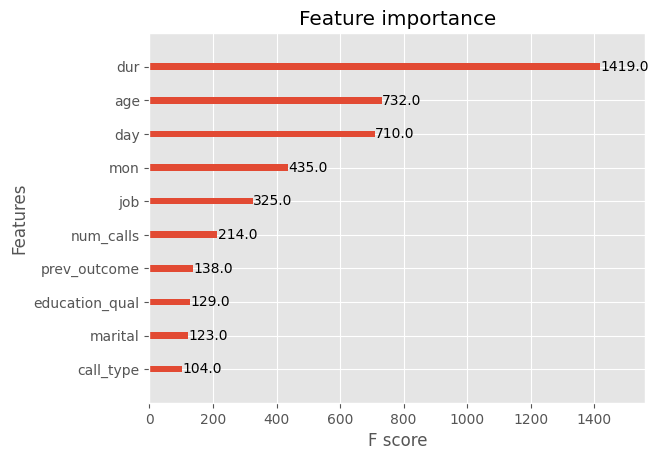

In [ ]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

**Conclusion:**

Based on the Feature Importance given by best machine Learning that will predict if a client subscribed to the insurance.

The client should focused on the top few features of order given below to have them subscribed to the insurance.

**Duration** - Longer the call better influncing the clients

**Age** - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people

**Day** - People who subscribed to insurance are mostly mid of the month.

**Month** - In the month of may people subscribed to insurance are more.

**Job** - In this blue collar people are targeted more but people who subscribed more are from management job.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
from sklearn.linear_model import LinearRegression #import
linear_model=LinearRegression(fit_intercept=True) #initialise
linear_model.fit(x_train,y_train) #fit - all magic
linear_model.predict(x_test)

array([ 0.05649628,  0.06214762,  0.13307166, ..., -0.04447822,
        0.1496982 ,  0.12089416])

In [ ]:
cross_val_linear_model=cross_val_score(linear_model,x_train,y_train,cv=10).mean()
cross_val_linear_model

0.25393647142397563